In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
import os
print("Current working directory:", os.getcwd())

Current working directory: c:\Users\admin\Desktop\Projects\Customer-Churn-Prediction\notebooks


In [5]:
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [6]:
df =  df.drop("customerID",axis=1)

In [7]:
df['TotalCharges'] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [8]:
print(df["TotalCharges"].isnull().sum())

0


In [9]:
binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling",
               "Churn", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
               "TechSupport", "StreamingTV", "StreamingMovies", "MultipleLines"]

for col in binary_cols:
    df[col] = df[col].replace({"Yes": 1, "No": 0, "No phone service": 0, "No internet service": 0})

In [10]:
# Columns like Partner and Churn have Yes/No values.
# replace() converts:
# Yes → 1   No → 0
# Some features have extra “No service” category → we also map it to 0.

In [11]:
multi_col = ['InternetService','Contract','PaymentMethod']
df = pd.get_dummies(df, columns=multi_col, drop_first=True)

In [12]:
# Columns like Contract have more than 2 categories (Month-to-month, One year, Two year).
# get_dummies() creates new binary columns for each category:
# Example: Contract_One year, Contract_Two year → 1 if the customer has that type, else 0.

# drop_first=True → avoids dummy variable trap (keeps one category as baseline).
# Dummy Variable Trap: A situation where one dummy variable can be predicted from the others (perfect multicollinearity).
# drop_first=True avoids this by dropping one category and using it as the baseline reference.

In [13]:
num_col = ['tenure','MonthlyCharges','TotalCharges']
scaler = StandardScaler()
df[num_col] = scaler.fit_transform(df[num_col])

In [14]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,0,-1.277445,0,0,0,1,0,...,-1.160323,-0.994242,0,False,False,False,False,False,True,False
1,Male,0,0,0,0.066327,1,0,1,0,1,...,-0.259629,-0.173244,0,False,False,True,False,False,False,True
2,Male,0,0,0,-1.236724,1,0,1,1,0,...,-0.362660,-0.959674,1,False,False,False,False,False,False,True
3,Male,0,0,0,0.514251,0,0,1,0,1,...,-0.746535,-0.194766,0,False,False,True,False,False,False,False
4,Female,0,0,0,-1.236724,1,0,0,0,0,...,0.197365,-0.940470,1,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,-0.340876,1,1,1,0,1,...,0.665992,-0.128655,0,False,False,True,False,False,False,True
7039,Female,0,1,1,1.613701,1,1,0,1,1,...,1.277533,2.243151,0,True,False,True,False,True,False,False
7040,Female,0,1,1,-0.870241,0,0,1,0,0,...,-1.168632,-0.854469,0,False,False,False,False,False,True,False
7041,Male,1,1,0,-1.155283,1,1,0,0,0,...,0.320338,-0.872062,1,True,False,False,False,False,False,True


In [15]:
df["Gender"] = df["gender"].map({"Male": 1, "Female": 0})

In [16]:
df = pd.get_dummies(df,drop_first=True)

In [17]:
df.dtypes

SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                   float64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_One year                           bool
Contract_Two year                           bool
PaymentMethod_Credit

In [18]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# add stratify=y to keep the same churn ratio in train and test sets (since churn is imbalanced).

In [20]:
log_reg = LogisticRegression(class_weight="balanced", random_state=42, max_iter=100)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [21]:
y_pred = log_reg.predict(X_test)

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7388218594748048

Confusion Matrix:
 [[748 287]
 [ 81 293]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



In [23]:
dt = DecisionTreeClassifier(random_state=42, class_weight="balanced")
dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [24]:
y_pred_dt = dt.predict(X_test)

In [25]:
print("Accuracy Score",accuracy_score(y_test, y_pred_dt))
print("\nConfusion_matrix:\n",confusion_matrix(y_test, y_pred_dt))
print("\nClassification_report:\n",classification_report(y_test, y_pred_dt))

Accuracy Score 0.7366926898509581

Confusion_matrix:
 [[856 179]
 [192 182]]

Classification_report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82      1035
           1       0.50      0.49      0.50       374

    accuracy                           0.74      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.74      0.74      1409



In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)

In [28]:
print("Accuracy Score:", accuracy_score(y_test,y_pred_rf))
print("Classification Report:", classification_report(y_test,y_pred_rf))

Accuracy Score: 0.7899219304471257
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



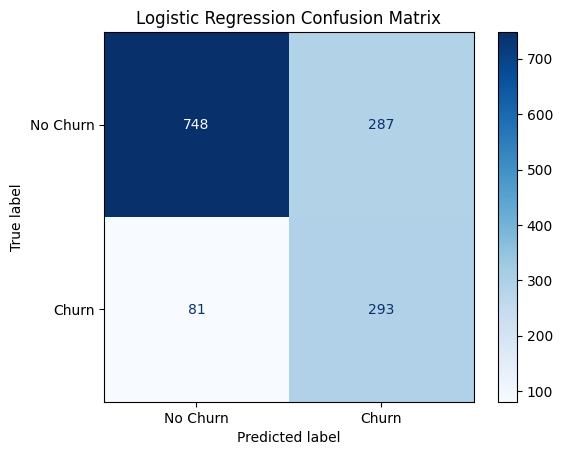

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

# Logistic Regression
cm_lr = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm_lr, display_labels=["No Churn", "Churn"]).plot(cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

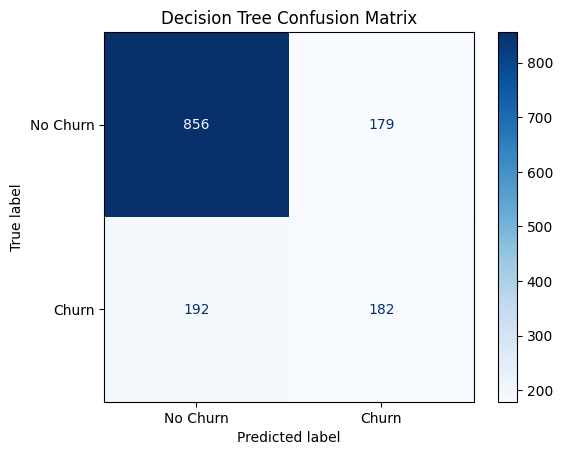

In [32]:
# Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
ConfusionMatrixDisplay(cm_dt, display_labels=["No Churn", "Churn"]).plot(cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()

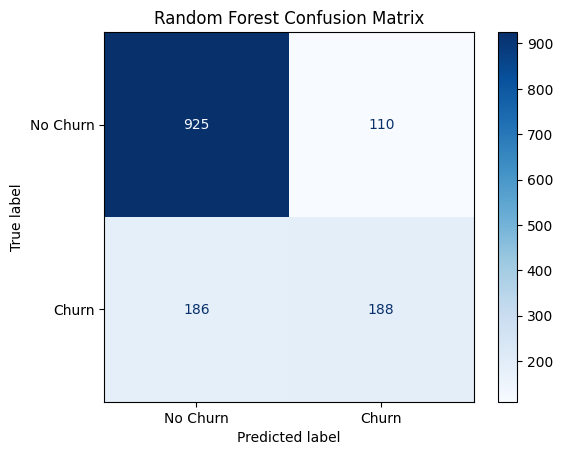

In [33]:
# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf, display_labels=["No Churn", "Churn"]).plot(cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precision": [
        precision_score(y_test, y_pred),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_rf)
    ],
    "Recall": [
        recall_score(y_test, y_pred),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_rf)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf)
    ]
})

In [35]:
print(results)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.738822   0.505172  0.783422  0.614256
1        Decision Tree  0.736693   0.504155  0.486631  0.495238
2        Random Forest  0.789922   0.630872  0.502674  0.559524


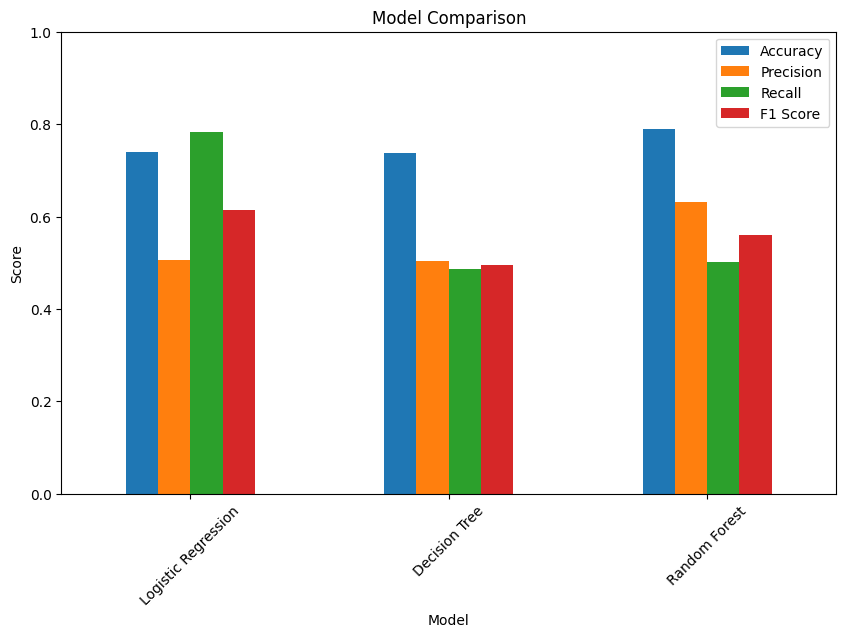

In [36]:
results.set_index("Model")[["Accuracy","Precision","Recall","F1 Score"]].plot(kind="bar", figsize=(10,6))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.show()

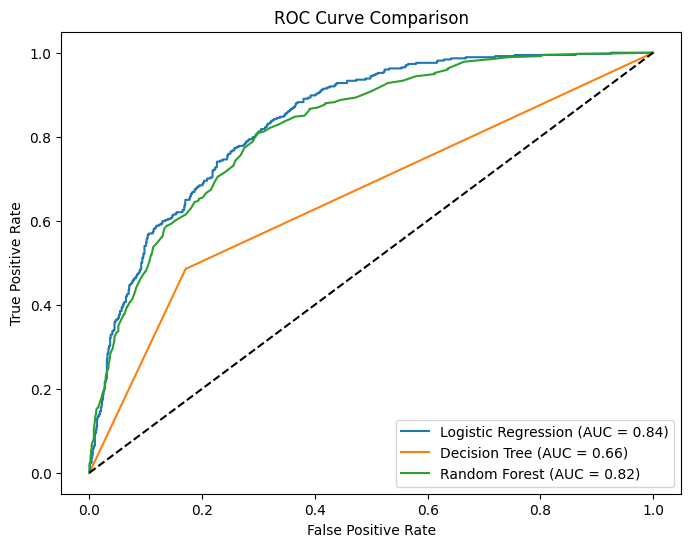

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get prediction probabilities
y_prob_lr = log_reg.predict_proba(X_test)[:,1]
y_prob_dt = dt.predict_proba(X_test)[:,1]
y_prob_rf = rf.predict_proba(X_test)[:,1]

# ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_score(y_test, y_prob_dt):.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})")

plt.plot([0,1],[0,1],"k--")  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()
